In [1]:
import numpy as np
import scipy.linalg as la
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import torch
from sympy.utilities.iterables import multiset_permutations
import pickle

import time
tStart_notebook = time.time()

import sys
sys.path.insert(0, '../source')

from source.FomShallowIce import FomShallowIce
from source.PolyRomIntrusiveShallowIce import PolyRomIntrusiveShallowIce
from source.FoodReprojectionTime import FoodReprojectionTime
from source.FoodTime import FoodTime
import source.comparisons as testing
from source.ConstrainedOpInf import ConstrainedOpInf
from source.SnapshotTransformer import SnapshotTransformerExtension as SnapshotTransformer
from source.NestFire import NestFire

import opinf as opinf
from source.SnapshotTransformer import SnapshotTransformerExtension as SnapshotTransformer

import source.helpers_polyMat as polyMat
import source.helpers_opinf as helpers_opinf
import source.solvers as solvers

## Load models

In [2]:
with open('data/fom_1e-3', 'rb') as handle:
    [U, grid_t, final_time] = pickle.load(handle)
    
# with open('opinf_standard_simple_2', 'rb') as handle:
#     ROMq_opinf = pickle.load(handle)
with open('data/opinf_standard', 'rb') as handle:
    loaded = pickle.load(handle)
ROMq_opinf = loaded.ROMq
    
with open('data/nested_regularized_3', 'rb') as handle:
    ROMq_nested = pickle.load(handle)
    
with open('data/RB_slicer1', 'rb') as handle:
    [transformer, U_train, VR, nRB, slicer] = pickle.load(handle)

In [3]:
for rom in ROMq_opinf:
    rom.kept = [polyMat.keptIndices_p(rom.nRB, j) for j in range(max(rom.polyOrders) + 1)]

In [4]:
names = ["nested", "regularized", "projection"]
list_ROMq = [ROMq_nested, ROMq_opinf]

errors = testing.error_comparison(list_ROMq = list_ROMq, 
                                  list_U_test = [U], 
                                  grid_t = grid_t, 
                                  Xi_test = [None], 
                                  VR = VR)

r = 1: Online compute time: 3.264185905456543 s.
r = 2: Online compute time: 3.820831775665283 s.
r = 3: Online compute time: 3.7254092693328857 s.
r = 4: Online compute time: 3.929385185241699 s.
r = 5: Online compute time: 4.320802450180054 s.
r = 6: Online compute time: 4.249344825744629 s.
r = 7: Online compute time: 4.633180379867554 s.
r = 1: Online compute time: 3.250253438949585 s.
r = 2: Online compute time: 3.8218345642089844 s.
r = 3: Online compute time: 3.783344030380249 s.
r = 4: Online compute time: 4.020914077758789 s.
aborting RK_midpoint due to suspected divergence
r = 5: Online compute time: 1.961867094039917 s.
r = 6: Online compute time: 4.160048246383667 s.
aborting RK_midpoint due to suspected divergence
r = 7: Online compute time: 3.0249292850494385 s.


/workspace/anaconda3/envs/pyapprox-opinf/lib/python3.8/site-packages/numpy/lib/shape_base.py:1179: RuntimeWarning: overflow encountered in multiply
  result = _nx.multiply(a_arr, b_arr, subok=(not is_any_mat))
/workspace/git-save/Nested-OpInf/source/PolyRomTime.py:67: RuntimeWarning: invalid value encountered in matmul
  summands = [assembled[i] @ exp_p(x, self.polyOrders[i], self.kept) for i in explicit_indices]


aborting RK_midpoint due to suspected divergence
r = 8: Online compute time: 1.3616652488708496 s.


figsize:  10 4


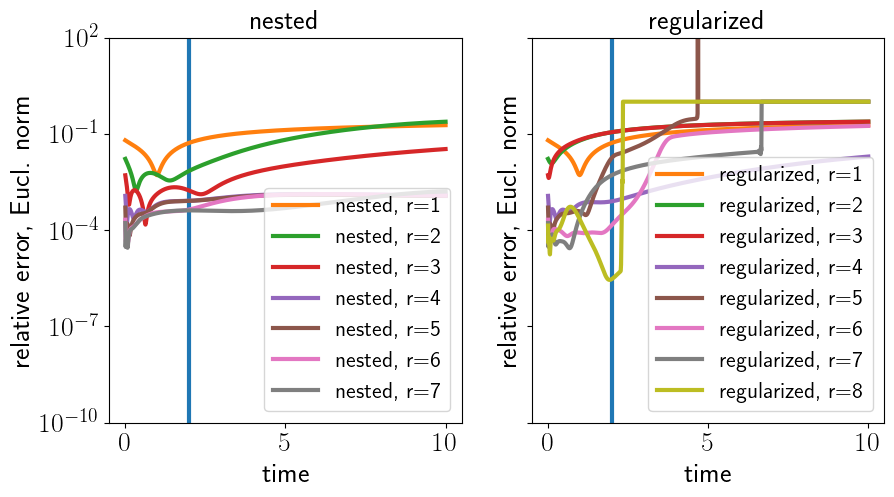

In [5]:
testing.plot_error_comparison_horizontal(errors = errors, 
                              model_indices = [0, 1], 
                              error_indices = [3], 
                              para_index = 0, 
                              final_training_time = 2, 
                              grid_t = grid_t, 
                              names = names)

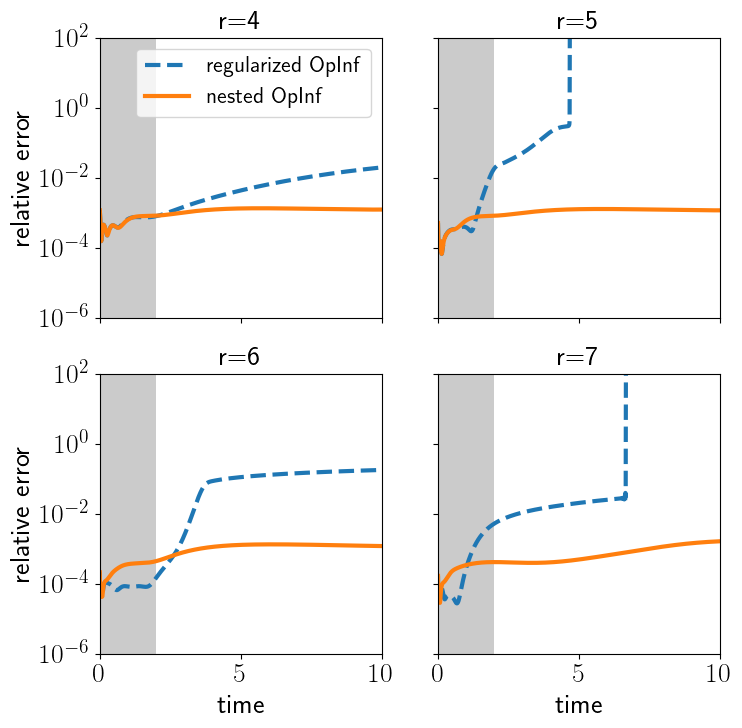

In [6]:
slicer = 10

fig, axs = plt.subplots(2, 2, figsize = (8,8), sharey=True, sharex = True)

dimensions = [4, 5, 6, 7]

counter = 0
for i in range(2):
    for j in range(2):
        
        reg = errors[0, 1, 3, dimensions[counter]-1].copy()
        reg[np.where(reg > 0.95)[0]] = 1e+3
        axs[i,j].semilogy(grid_t[::slicer], reg[::slicer], label = "regularized OpInf", linestyle = "--")
        
        axs[i,j].semilogy(grid_t[::slicer], errors[0, 0, 3, dimensions[counter]-1][::slicer], 
                          label = "nested OpInf")
        
        axs[i,j].set_title("r={}".format(dimensions[counter]))
        axs[i,j].axvspan(0, 2, facecolor='0.2', alpha=0.25)
        
        counter += 1
        
axs[0, 0].set_ylim(1e-6, 100)
axs[0, 0].set_xlim(0, 10)

axs[0,0].set_ylabel("relative error")
axs[1,0].set_ylabel("relative error")
axs[1,0].set_xlabel("time")
axs[1,1].set_xlabel("time")

axs[0,0].legend()

#fig.savefig("errorcomparison.png")